In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



**prediction model to predict the Clearsky Global Horizontal Irradiance(GHI)**

In [3]:
s = pd.read_csv('/content/drive/MyDrive/train.csv')
s.head(10)
s.tail(10)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
175286,2018,12,31,19,0,75,854,524,6,19.4,23.0,1006,80.27,58.25,3.3,185.0,5.2,0
175287,2018,12,31,19,30,73,827,474,4,19.4,22.8,1007,81.33,61.02,3.4,188.0,5.0,0
175288,2018,12,31,20,0,70,788,410,4,19.4,22.5,1007,82.75,64.46,3.4,191.0,4.8,0
175289,2018,12,31,20,30,66,736,336,4,19.4,22.0,1007,85.30,68.48,3.5,195.0,4.3,0
175290,2018,12,31,21,0,61,660,254,4,19.4,21.5,1007,87.84,72.98,3.6,199.0,3.9,29
175291,2018,12,31,21,30,51,555,168,4,19.4,20.8,1008,91.77,77.86,3.7,204.0,3.5,100
175292,2018,12,31,22,0,37,388,84,4,19.1,20.1,1008,93.88,83.03,3.8,209.0,3.2,100
175293,2018,12,31,22,30,15,115,18,7,19.1,19.6,1008,96.83,88.32,3.8,208.0,2.6,57
175294,2018,12,31,23,0,0,0,0,7,18.7,19.2,1009,96.84,94.34,3.7,206.0,2.1,0
175295,2018,12,31,23,30,0,0,0,7,18.7,19.2,1009,96.84,100.22,3.7,206.0,2.1,0


**STATISTICAL DESCRIPTION OF THE GIVEN DATASET**

In [4]:
s.describe()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,2013.500274,6.523549,15.727820,11.500000,15.000000,53.065426,330.065295,254.365490,2.540474,13.564431,18.266769,1003.185230,79.376366,89.729463,2.903732,188.877796,2.262871,0.740433
std,2.871908,3.448543,8.799349,6.922206,15.000043,64.201407,370.030821,327.705006,3.021879,8.196787,8.943096,5.935749,19.678235,40.085451,1.546979,99.014733,1.281902,6.575655
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.000000,-9.000000,970.000000,7.190000,8.550000,0.122000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000,1000.000000,65.590000,56.450000,1.534000,97.400000,1.300000,0.000000
50%,2013.500000,7.000000,16.000000,11.500000,15.000000,0.000000,0.000000,0.000000,1.000000,15.000000,20.000000,1000.000000,84.230000,89.860000,2.866000,200.000000,2.000000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,30.000000,103.000000,736.000000,535.000000,6.000000,21.000000,25.000000,1010.000000,97.950000,123.060000,4.223000,272.000000,3.000000,0.000000
max,2018.000000,12.000000,31.000000,23.000000,30.000000,565.000000,1040.000000,1063.000000,10.000000,26.900000,40.000000,1024.000000,100.000000,171.550000,7.700000,360.000000,12.900000,100.000000


**check null values if any**

**check correlation among features** 

In [5]:
#s.isnull().sum()
s.corr()
#sn.heatmap(s)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
Year,1.000000,-1.250676e-04,1.438112e-04,0.000000e+00,0.000000,-0.027271,0.010488,0.001011,0.059987,0.059990,0.041339,0.170655,0.006729,-0.000043,0.057450,-0.032013,-0.025577,0.132889
Month,-0.000125,1.000000e+00,1.079604e-02,-2.852658e-19,0.000000,-0.052826,-0.020091,-0.039901,-0.017394,0.146819,0.200660,-0.046228,-0.109397,0.039427,0.180774,-0.132582,-0.097522,0.005900
Day,0.000144,1.079604e-02,1.000000e+00,-1.030673e-17,0.000000,-0.004006,0.000962,0.000383,0.001174,0.023617,0.022825,-0.040792,0.000032,-0.001020,0.008565,0.006696,-0.006481,-0.001522
Hour,0.000000,-2.852658e-19,-1.030673e-17,1.000000e+00,0.000000,0.688314,0.738537,0.650697,-0.026036,0.021269,0.281493,-0.027240,-0.496931,-0.732434,0.012487,0.005142,0.247012,0.055630
Minute,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-0.001514,-0.001348,-0.000164,0.000485,-0.002042,-0.011724,-0.001636,0.018638,-0.000006,-0.000083,0.000011,-0.009258,-0.000929
Clearsky DHI,-0.027271,-5.282618e-02,-4.005800e-03,6.883137e-01,-0.001514,1.000000,0.860988,0.912991,0.022479,0.222931,0.503409,-0.093766,-0.559766,-0.873421,0.207504,-0.000195,0.315655,0.000740
Clearsky DNI,0.010488,-2.009111e-02,9.616594e-04,7.385367e-01,-0.001348,0.860988,1.000000,0.927926,-0.073302,0.033601,0.384353,0.007043,-0.680471,-0.886323,-0.002180,0.006256,0.381162,0.006318
Clearsky GHI,0.001011,-3.990135e-02,3.825070e-04,6.506965e-01,-0.000164,0.912991,0.927926,1.000000,-0.047297,0.140420,0.478273,-0.050556,-0.655765,-0.891033,0.108725,0.004944,0.349180,-0.030297
Cloud Type,0.059987,-1.739447e-02,1.173973e-03,-2.603568e-02,0.000485,0.022479,-0.073302,-0.047297,1.000000,0.202096,0.066777,-0.137158,0.235374,0.026873,0.326904,-0.081565,0.072632,0.090161
Dew Point,0.059990,1.468194e-01,2.361671e-02,2.126862e-02,-0.002042,0.222931,0.033601,0.140420,0.202096,1.000000,0.848948,-0.419534,0.193455,-0.222336,0.881881,-0.076357,-0.140699,0.036851


In [6]:
s.columns


Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

In [7]:
X = s[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']]
y = s['Clearsky GHI']       

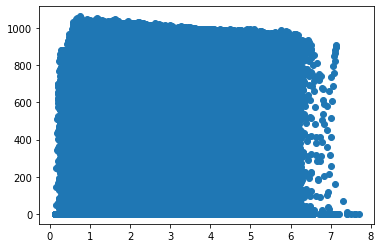

In [8]:
plt.scatter(X['Precipitable Water'], y)

In [9]:
mms = MinMaxScaler()
X = mms.fit_transform(X)


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)
X_train


array([[0.88888889, 1.        , 0.86666667, ..., 0.06555556, 0.1627907 ,
        0.        ],
       [0.11111111, 0.09090909, 0.        , ..., 0.24833333, 0.07751938,
        0.        ],
       [0.55555556, 0.27272727, 0.7       , ..., 0.77472222, 0.17829457,
        0.        ],
       ...,
       [0.66666667, 0.72727273, 0.13333333, ..., 0.28166667, 0.05426357,
        0.        ],
       [1.        , 0.72727273, 0.1       , ..., 0.22777778, 0.07751938,
        1.        ],
       [0.44444444, 0.63636364, 0.6       , ..., 0.25333333, 0.20930233,
        0.        ]])

**on studying the behaviour of the given dataset it is fair to use random forest regressor technique **

In [11]:
rgr = RandomForestRegressor()

In [12]:
model = rgr.fit(X_train, y_train)
model

RandomForestRegressor()

**CHECKING OVERFITTING / UNDER FITTING**

In [13]:
print('test data score :', model.score(X_test,y_test))
print('train data score :', model.score(X_train,y_train))

test data score : 0.9999555112654909
train data score : 0.9999932978642699


In [14]:
y_pred = model.predict(X_test)
y_diff = y_test-y_pred


**METRICS FOR THE ABOVE REGRESSION MODEL**

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
print(mean_squared_error(y_test, y_pred, squared = False))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))


2.1802873632411814
1.0710824301197948
0.0030497514401472527


**save the model using pickle**

In [17]:
import pickle

#save the model as pickle string
save_model = pickle.dumps(model)

#load the pickle model
solar_model = pickle.loads(save_model)






In [18]:
#use the model
solar_model.predict(X_test)



array([142.99, 977.12, 262.32, ..., 475.28,   0.  , 856.92])